In [1]:
import numpy as np
from scipy import stats
from lib.DataManager import *
from lib.PolicyStats import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
num_states = 18
num_actions = 4
gamma = 0.95

In [3]:
histories = GetHistories("data\\mockworld_data.csv", gamma)

line 0
line 1000000
line 2000000
line 3000000
line 4000000
line 5000000
line 6000000


In [4]:
avg_returns = np.zeros((num_states,num_actions))
visit_count = np.zeros((num_states,num_actions))
for traj in histories:
    total_return = traj["return"]
    states = traj["St"]
    actions = traj["At"]
    avg_returns[states, actions] += total_return
    visit_count[states, actions] += 1
    
avg_returns /= visit_count
print(avg_returns)
    
    

C:\Users\mfcli\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


[[0.89905819 1.01331004 0.90190327 1.01285793]
 [0.75883575 0.86321006 0.73786847 0.85360434]
 [0.66486147 0.78324774 0.63376936 0.73099521]
 [0.61662801 0.74004659 0.60443026 0.61895621]
 [0.74034281 0.85858765 0.76523534 0.85585134]
 [0.68692134 0.84070106 0.68393597 0.84328913]
 [0.63942088 0.86381725 0.64464655 0.79985234]
 [0.60630802 0.92016261 0.64461015 0.68854687]
 [0.64247452 0.73344154 0.66683637 0.78306731]
 [0.64398397 0.79185935 0.64404977 0.85951201]
 [0.64227609 0.92167018 0.64166884 0.92562106]
 [0.64367796 1.17272722 0.70040961 0.82758789]
 [0.60598543 0.61871873 0.62761144 0.747611  ]
 [0.64342738 0.68706574 0.60992136 0.91858058]
 [0.70325612 0.83910792 0.64055345 1.16959959]
 [       nan        nan        nan        nan]
 [1.56172558 1.5431968  0.78406449 0.79084486]
 [0.92914023 0.92295807 1.92310158 1.88794284]]


In [5]:
print(histories[0]["return"])
avg_exploratory_J = GetAverageReturn(histories)

0.22593554099256555
Average Baseline Return : 1.171164966750352


In [6]:
visit_count = np.zeros((num_states,num_states,num_actions))
for traj in histories:
    reward_sum = traj["Rt"].sum()
    if(reward_sum == 1):
        continue
    cur_states = traj["St"][:-1]
    next_states = traj["St"][1:]
    actions = traj["At"][:-1]
    visit_count[cur_states, next_states, actions] += 1
    
print(visit_count)
    

[[[40706.     0. 40670.     0.]
  [    0.     0.     0. 49141.]
  [    0.     0.     0.     0.]
  ...
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]]

 [[    0.     0. 35913.     0.]
  [33142.     0.     0.     0.]
  [    0.     0.     0. 38910.]
  ...
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]]

 [[    0.     0.     0.     0.]
  [    0.     0. 30676.     0.]
  [27107.     0.     0.     0.]
  ...
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]]

 ...

 [[    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  ...
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]]

 [[25048. 25111.  6188.  6185.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  ...
  [    0.     0.     0.     0.]
  [    0.     0.     0.     0.]
  [    0.     0.     0.     

In [7]:
result = ""
for i in range(visit_count.shape[0]):
    print("---state " + str(i) + "---")
    state_transitions = visit_count[i]
    possible_transitions = np.where(np.sum(state_transitions,axis=1) > 0)[0]
    for ns in possible_transitions:
        actions = list(np.where(state_transitions[ns] != 0)[0])
        result += str(i) + " " + str(ns) + " " + ",".join(str(a) for a in actions) + "\n"  
        print(ns, state_transitions[ns])
    print("------------------")
print(result)

---state 0---
0 [40706.     0. 40670.     0.]
1 [    0.     0.     0. 49141.]
4 [    0. 49320.     0.     0.]
------------------
---state 1---
0 [    0.     0. 35913.     0.]
1 [33142.     0.     0.     0.]
2 [    0.     0.     0. 38910.]
5 [    0. 39587.     0.     0.]
------------------
---state 2---
1 [    0.     0. 30676.     0.]
2 [27107.     0.     0.     0.]
3 [    0.     0.     0. 30613.]
6 [    0. 33217.     0.     0.]
------------------
---state 3---
2 [    0.     0. 26522.     0.]
3 [22223.     0.     0. 22305.]
7 [    0. 28384.     0.     0.]
------------------
---state 4---
0 [36110.     0.     0.     0.]
4 [    0.     0. 33373.     0.]
5 [    0.     0.     0. 39562.]
8 [    0. 39111.     0.     0.]
------------------
---state 5---
1 [33340.     0.     0.     0.]
4 [    0.     0. 33390.     0.]
6 [    0.     0.     0. 36625.]
9 [    0. 36772.     0.     0.]
------------------
---state 6---
2 [28714.     0.     0.     0.]
5 [    0.     0. 29707.     0.]
7 [    0.     0.    

In [8]:
test_list = np.zeros((4,4))
possible_rewards = {}
initial_rewards = {}
heatmap = np.zeros((num_actions,num_actions,num_actions, 4,4))
for traj in histories:
    reward_sum = traj["Rt"].sum()
    possible_rewards.setdefault(reward_sum, 0)
    possible_rewards[reward_sum] += 1
    states = traj["St"][2:]
    A_states_17 = traj["At"][0]
    A_states_16 = traj["At"][1]
    R_states_17 = traj["Rt"][0]
    R_states_16 = traj["Rt"][1]
    last_reward = traj["Rt"][-1]
    
    
#     if(reward_sum != 2 and (A_states_17 == 2 or A_states_17 == 3) and (A_states_16 == 0 or A_states_16 == 1)):
#         print("wow")
    
#     if(reward_sum != 11):
#         continue
    test_list[A_states_17, A_states_16] += 1
    key = str(R_states_17) + "," + str(R_states_16) + "," + str(last_reward)
    initial_rewards.setdefault(key, 0)
    initial_rewards[key] += 1
    
    actions = traj["At"][2:]
    
    x_cords = states // 4
    y_cords = states % 4
    heatmap[A_states_17, A_states_16, actions, x_cords,y_cords] += reward_sum

In [9]:
test_list

array([[9481., 9467., 9526., 9257.],
       [9247., 9318., 9258., 9427.],
       [3188., 3155., 3125., 3174.],
       [3132., 3171., 3063., 3011.]])

In [10]:
initial_rewards

{'0.0,0.0,1.0': 37468,
 '0.0,0.0,10.0': 37513,
 '1.0,0.0,10.0': 12373,
 '1.0,0.0,1.0': 12646}

In [11]:
possible_rewards

{1.0: 37468, 10.0: 37513, 11.0: 12373, 2.0: 12646}

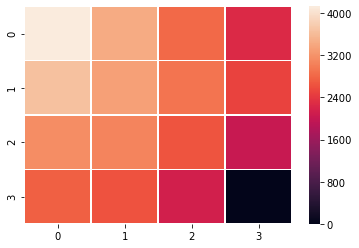

In [12]:
a_17 = 3
a_16 = 1
a = 0
ax1 = sns.heatmap(heatmap[a_17,a_16,a], linewidth=0.5)
plt.show()

In [13]:
max_traj = None
last_states = {}
for traj in histories:
    last_states[traj["St"][-1]] = 1
    if(max_traj == None or traj["return"] > max_traj["return"]):
        max_traj = traj      

In [14]:
last_states

{11: 1, 14: 1}

In [15]:
print(max_traj["St"])
print(max_traj["At"])
print(max_traj["Rt"])
print(max_traj["return"])

[17 16  0  4  5  9 13 14]
[3 3 1 3 1 1 3 3]
[ 1.  0.  0.  0.  0.  0.  0. 10.]
7.983372960937498


In [16]:
avg_exploratory_J = GetAverageReturn(histories)

Average Baseline Return : 1.171164966750352


Notes:
- You need to take (2 or 3) from both state 17 and 16 to achieve > 10 total reward.
- actions from start (2 or 3) --> (0,1) guarantee 2 total reward